# Motivation
In today's world, where the population is growing at a tremendous pace, the challenges regarding food production are also increasing, with the primary objective of keeping the supply in line with the demand. In agriculture, crop diseases are common, and it becomes crucial to keep the crops away from these diseases. It becomes even more strenuous to keep every plant in check.

# Objective
The goal of this project is to create a CNN model that can accurately predict if a plant's leaf is healthy or infected, and if infected, then what disease is involved. Here I've used transfer learning and also used the VGG16 model as a base for prediction.

In [1]:
# Importing the required Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import glob
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_path = "../input/tomato-leaf-disease/Tomato Leaf Diseases/Training Set"
valid_path = "../input/tomato-leaf-disease/Tomato Leaf Diseases/Validation Set"

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True, 
                                   vertical_flip=True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
# Augmenting training data for more training examples
training_set = train_datagen.flow_from_directory('../input/tomato-leaf-disease/Tomato Leaf Diseases/Training Set',
                                                 target_size = (224, 224),
                                                 batch_size = 200,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [5]:
validation_set = valid_datagen.flow_from_directory('../input/tomato-leaf-disease/Tomato Leaf Diseases/Validation Set',
                                            target_size = (224, 224),
                                            batch_size = 70,
                                            class_mode = 'categorical')

Found 7000 images belonging to 10 classes.


# **Using Transfer Learning (VGG16)**

In [6]:
# Downloading the VGG16 model
vgg16_model =  tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 3s 0us/step


In [7]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [8]:
# Not training existing weights
for layer in model.layers:
    layer.trainable = False

In [9]:
model.add(Dense(units=10, activation= 'softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [12]:
mod = model.fit(x = training_set, validation_data=validation_set, epochs=50, verbose = 1)

Epoch 1/50
50/50 [==============================] - 285s 6s/step - loss: 2.1009 - accuracy: 0.2954 - val_loss: 1.7394 - val_accuracy: 0.4296
Epoch 2/50
50/50 [==============================] - 159s 3s/step - loss: 1.5625 - accuracy: 0.5093 - val_loss: 1.4902 - val_accuracy: 0.5271
Epoch 3/50
50/50 [==============================] - 162s 3s/step - loss: 1.3534 - accuracy: 0.5817 - val_loss: 1.3427 - val_accuracy: 0.5899
Epoch 4/50
50/50 [==============================] - 161s 3s/step - loss: 1.2325 - accuracy: 0.6186 - val_loss: 1.2377 - val_accuracy: 0.6100
Epoch 5/50
50/50 [==============================] - 159s 3s/step - loss: 1.1552 - accuracy: 0.6318 - val_loss: 1.1612 - val_accuracy: 0.6577
Epoch 6/50
50/50 [==============================] - 157s 3s/step - loss: 1.0870 - accuracy: 0.6606 - val_loss: 1.1023 - val_accuracy: 0.6569
Epoch 7/50
50/50 [==============================] - 159s 3s/step - loss: 1.0454 - accuracy: 0.6652 - val_loss: 1.0905 - val_accuracy: 0.6534
Epoch 8/50
50

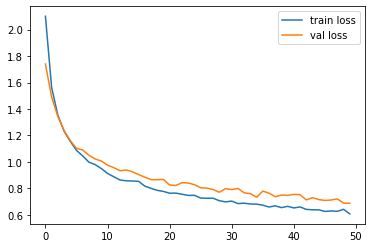

In [13]:
# Loss Plot
plt.plot(mod.history['loss'], label='train loss')
plt.plot(mod.history['val_loss'], label='val loss')
plt.legend()
plt.show()

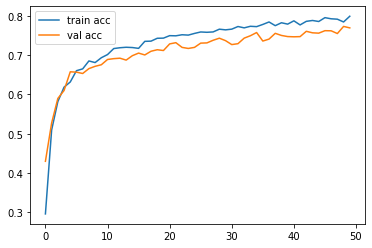

In [14]:
# accuracy plot
plt.plot(mod.history['accuracy'], label='train acc')
plt.plot(mod.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

**Note**
From the above Accuracy and Loss plots, it is evident that the model started to overfit a bit. That can be confirmed by looking at the diverging training and validation losses.

# Updating all the parameters of VGG16 model

In [15]:
vgg16 =  tf.keras.applications.vgg16.VGG16()

In [16]:
vggmodel = Sequential()
for layer in vgg16.layers[:-1]:
    vggmodel.add(layer)

In [17]:
vggmodel.add(Dense(units=10, activation= 'softmax'))
vggmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [18]:
vggmodel.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [19]:
vgg_mod = vggmodel.fit(x = training_set, validation_data=validation_set, epochs=100, verbose = 1)

Epoch 1/100
50/50 [==============================] - 195s 4s/step - loss: 11.0960 - accuracy: 0.1165 - val_loss: 2.2135 - val_accuracy: 0.1679
Epoch 2/100
50/50 [==============================] - 203s 4s/step - loss: 2.2123 - accuracy: 0.1538 - val_loss: 2.0920 - val_accuracy: 0.2306
Epoch 3/100
50/50 [==============================] - 195s 4s/step - loss: 2.0725 - accuracy: 0.2167 - val_loss: 2.0010 - val_accuracy: 0.2089
Epoch 4/100
50/50 [==============================] - 203s 4s/step - loss: 1.9133 - accuracy: 0.2785 - val_loss: 1.8182 - val_accuracy: 0.3399
Epoch 5/100
50/50 [==============================] - 211s 4s/step - loss: 1.7674 - accuracy: 0.3363 - val_loss: 1.7743 - val_accuracy: 0.3529
Epoch 6/100
50/50 [==============================] - 206s 4s/step - loss: 1.6850 - accuracy: 0.3709 - val_loss: 1.6301 - val_accuracy: 0.4016
Epoch 7/100
50/50 [==============================] - 213s 4s/step - loss: 1.4240 - accuracy: 0.4699 - val_loss: 1.5591 - val_accuracy: 0.4167
Epoch

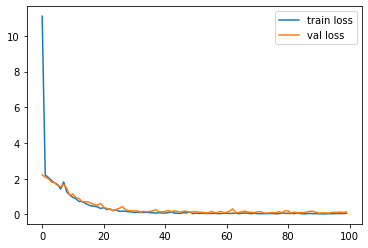

In [20]:
# Loss Plot
plt.plot(vgg_mod.history['loss'], label='train loss')
plt.plot(vgg_mod.history['val_loss'], label='val loss')
plt.legend()
plt.show()

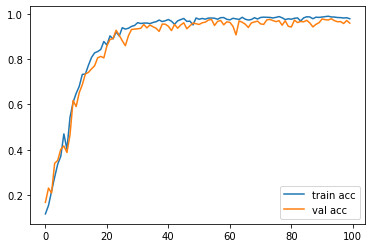

In [21]:
# accuracy plot
plt.plot(vgg_mod.history['accuracy'], label='train acc')
plt.plot(vgg_mod.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

Using the Vgg16 model as a base and updating all the parameters, we notice that it performs distinctly well as opposed to using Transfer Learning and can be confirmed by looking at the Loss curves where both overlap and do not diverge. Moreover, we can see from the logs that there isn't any significant improvement in the model's accuracy after epoch 40, and we can stop training the model there itself to save time.

In [25]:
# Saving the model as h5 file
model_json = vggmodel.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
vggmodel.save_weights("model.h5")


# Conclusion
1. Using transfer learning helped a bit, but as you can see from the previous loss and accuracy curves, the losses diverged before 10 epochs were completed, and after 50 epochs, 80% accuracy on training data was achieved.
2. When all the parameters of the VGG16 model are updated, we can see that training the model any further than 50 epochs did not achieve any significant improvements but a significantly higher accuracy than transfer learning.
3. Also, the loss on training and validation data pretty much overlap on the updated model, indicating a much robust model. 

# Limitations
Here I only used the VGG16 model because of hardware limitations and the time it was taking to train the model.